In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.core.computation.expressions import evaluate
from pandas.plotting import boxplot
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler

In [7]:
# 데이터 로드
df = pd.read_csv('./gym_members_exercise_tracking.csv')
df

SyntaxError: unterminated string literal (detected at line 2) (2080159427.py, line 2)

In [41]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [42]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [43]:
# 결측치 및 이상치 탐색
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

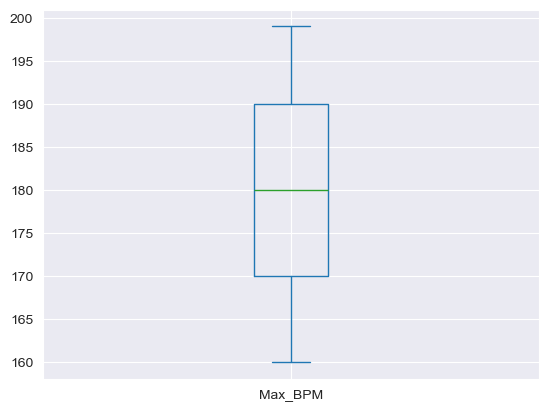

In [44]:
# boxplot을 통한 이상치 탐색
df['Max_BPM'].plot(kind='box')
plt.show()

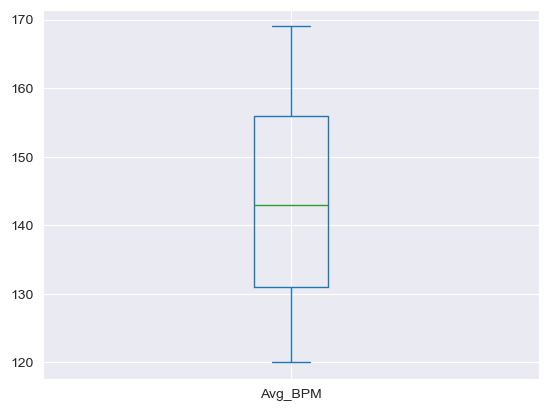

In [45]:
df['Avg_BPM'].plot(kind='box')
plt.show()

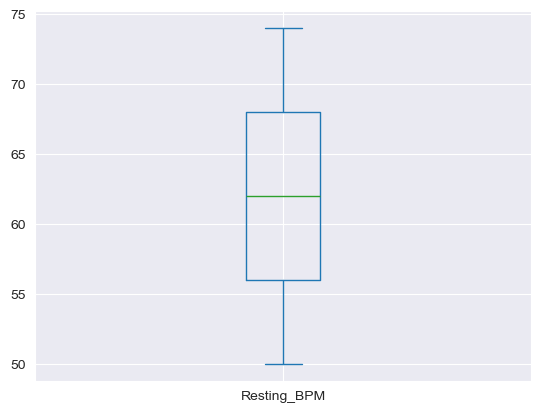

In [46]:
df['Resting_BPM'].plot(kind='box')
plt.show()

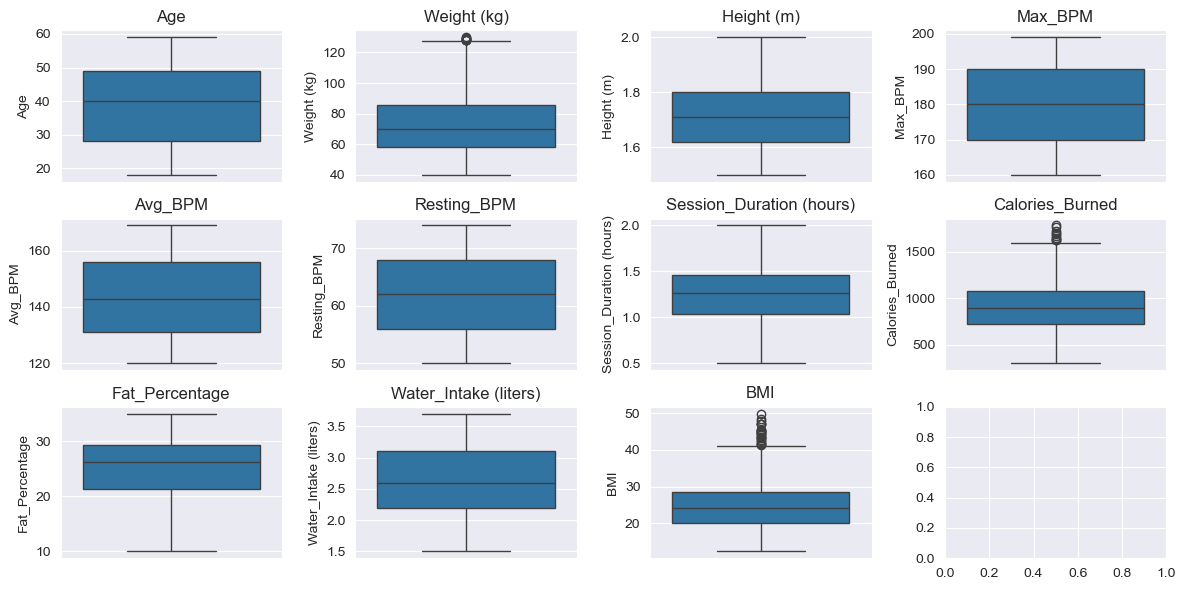

In [80]:
columns_check = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned','Fat_Percentage', 'Water_Intake (liters)', 'BMI']

fig, axes = plt.subplots(3, 4, figsize=(12, 6))

for i, col in enumerate(columns_check):
    row, col_position = divmod(i, 4)
    sns.boxplot(data=df, y=col, ax=axes[row, col_position])
    axes[row, col_position].set_title(col)
    
plt.tight_layout()
plt.show()


In [64]:
# 범주형 변수를 범주형 데이터로 변환
df['Gender'] = df['Gender'].astype('category')
df['Workout_Type'] = df['Workout_Type'].astype('category')
df['Experience_Level'] = df['Experience_Level'].astype('category')

# 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type', 'Experience_Level'], prefix=['Gender', 'Workout', 'Experience_Level'])

for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)
    
print(df_encoded.head())
print(df_encoded.dtypes)
print(df.columns)

   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  ...    BMI  Gender_Female  Gender_Male  \
0                    3.5  ...  30.20              0            1   
1                    2.1  ...  32.00              1            0   
2             

In [57]:
print(df['Workout_Type'].apply(type).unique())
print(df['Workout_Type'].unique())

[<class 'str'>]
['Yoga', 'HIIT', 'Cardio', 'Strength']
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']


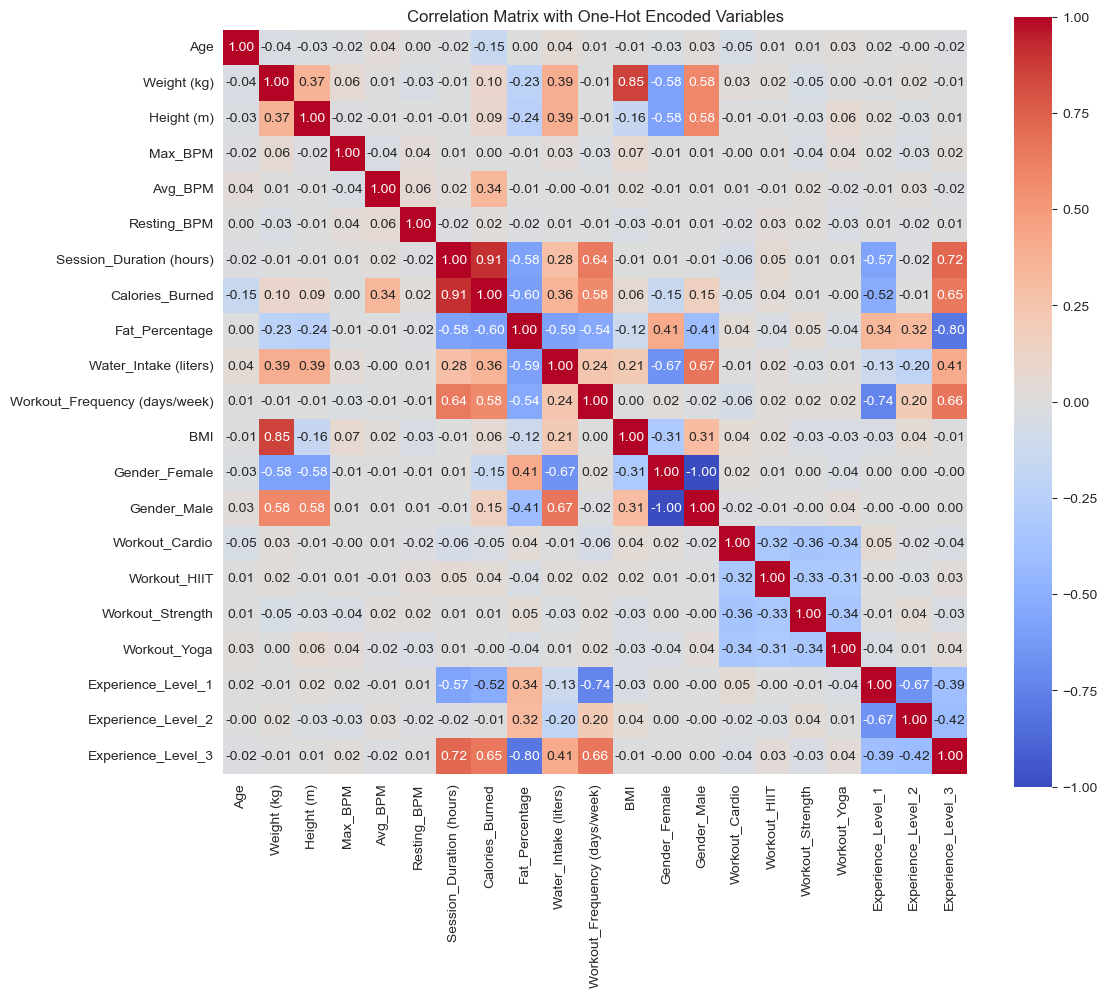

In [76]:
# 상관관계 분석 및 시각화
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix with One-Hot Encoded Variables')
plt.show()

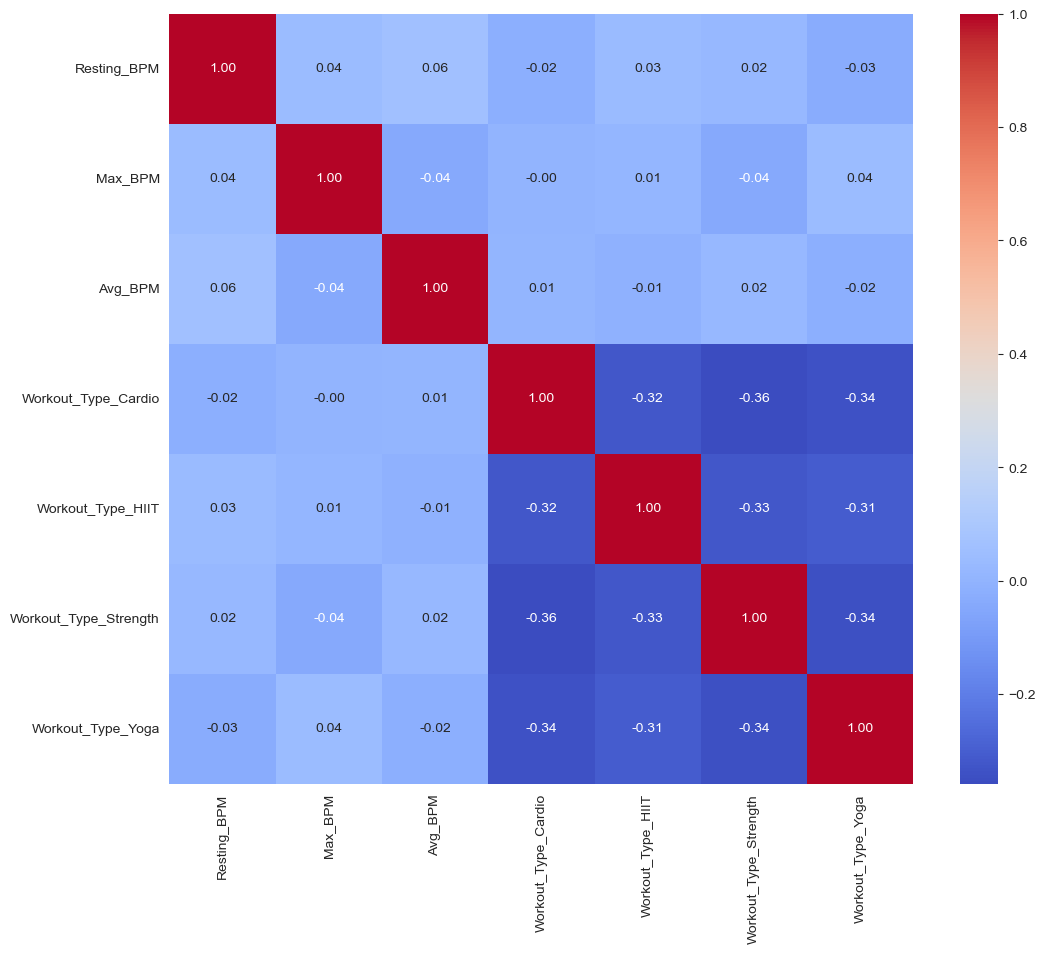

In [101]:
df_encoded = pd.get_dummies(df[['Workout_Type', 'Resting_BPM', 'Max_BPM', 'Avg_BPM']], columns=['Workout_Type'])

heatmap_data = df_encoded.corr()

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

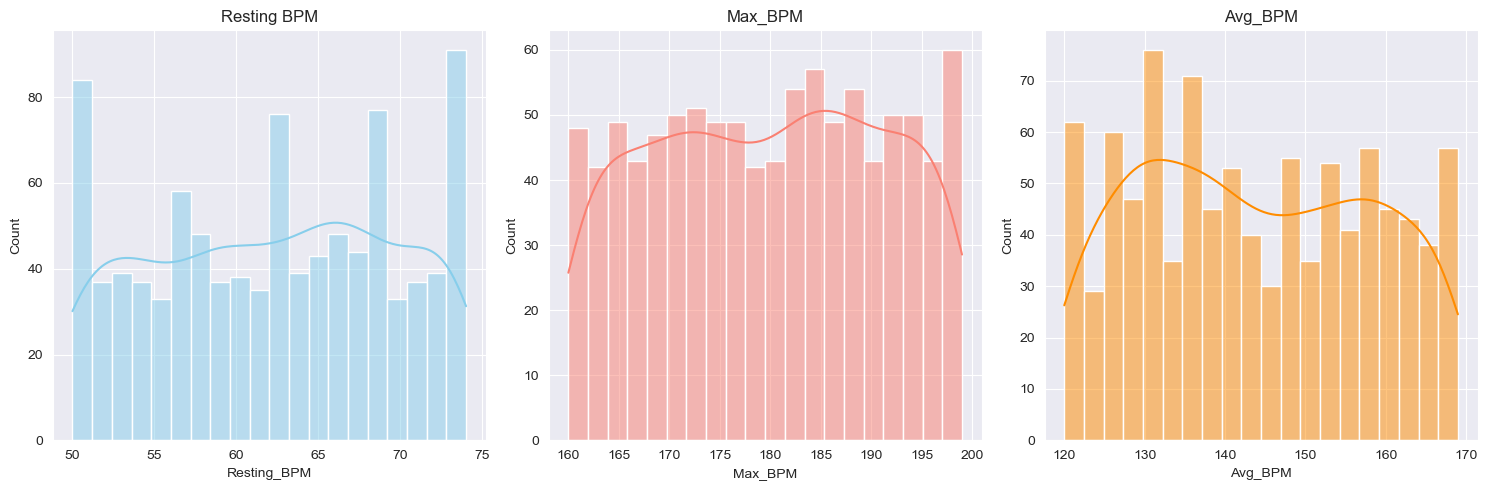

In [50]:
# 심박수 변수의 히스토그램 분포 확인
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.histplot(df['Resting_BPM'], bins=20, kde=True, color='skyblue')
plt.title('Resting BPM')

plt.subplot(1, 3, 2)
sns.histplot(df['Max_BPM'], bins=20, kde=True, color='salmon')
plt.title('Max_BPM')

plt.subplot(1, 3, 3)
sns.histplot(df['Avg_BPM'], bins=20, kde=True, color='darkorange')
plt.title('Avg_BPM')

plt.tight_layout()
plt.show()

C:\Users\playdata2\AppData\Local\Temp\ipykernel_7148\2916451679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workout_Type', y='Resting_BPM', data=df, palette='Set2')
C:\Users\playdata2\AppData\Local\Temp\ipykernel_7148\2916451679.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workout_Type', y='Max_BPM', data=df, palette='Set3')
C:\Users\playdata2\AppData\Local\Temp\ipykernel_7148\2916451679.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workout_Type', y='Avg_BPM', data=df, palette='Set1')


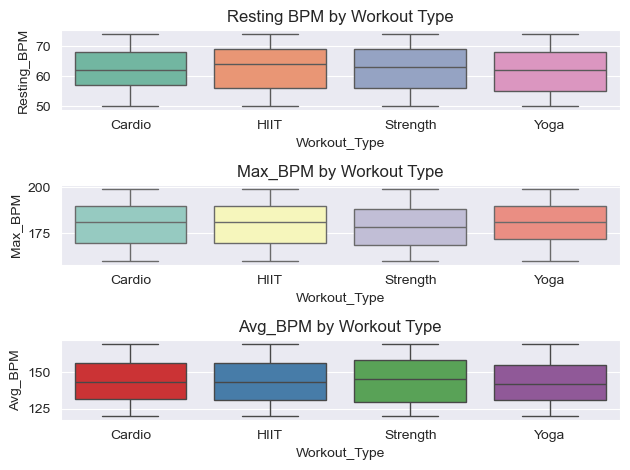

In [51]:
# 운동 종류별 심박수 분포 확인(박스플롯)
# restBPM-Workout_type별 박스 플롯
plt.subplot(3, 1, 1)
sns.boxplot(x='Workout_Type', y='Resting_BPM', data=df, palette='Set2')
plt.title('Resting BPM by Workout Type')

# Max_BPM - Workout_type별 박스 플롯
plt.subplot(3, 1, 2)
sns.boxplot(x='Workout_Type', y='Max_BPM', data=df, palette='Set3')
plt.title('Max_BPM by Workout Type')

# Avg_BPM - WOrkout_type 별 박스 플롯
plt.subplot(3, 1, 3)
sns.boxplot(x='Workout_Type', y='Avg_BPM', data=df, palette='Set1')
plt.title('Avg_BPM by Workout Type')

plt.tight_layout()
plt.show()

In [52]:
# 상관관계 분석
# 1. 운동 종류별 Resting_BPM, Max_BPM, AVG_BPM의 평균과 중앙값 계싼
bpm_stats = df.groupby('Workout_Type')[['Resting_BPM', 'Max_BPM', 'Avg_BPM']].agg(['mean','median'])

bpm_stats

C:\Users\playdata2\AppData\Local\Temp\ipykernel_7148\4118223461.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bpm_stats = df.groupby('Workout_Type')[['Resting_BPM', 'Max_BPM', 'Avg_BPM']].agg(['mean','median'])


Resting_BPM            Max_BPM            Avg_BPM       
                    mean median        mean median        mean median
Workout_Type                                                         
Cardio         61.988235   62.0  179.874510  181.0  143.890196  143.0
HIIT           62.687783   64.0  180.113122  181.0  143.524887  143.0
Strength       62.465116   63.0  179.027132  178.5  144.313953  145.0
Yoga           61.782427   62.0  180.606695  181.0  143.267782  142.0

In [53]:
# 운동 종류별 상관관계 분석

correlation_results = {}

# 각 운동 종류에 대해 상관관계 계산
for workout_type, group in df.groupby('Workout_Type'):
    correlation_matrix  =group[['Resting_BPM', 'Max_BPM', 'Avg_BPM']].corr()
    correlation_results[workout_type] = correlation_matrix
    print(f'\nCorelation Matrix for {workout_type}: \n{correlation_matrix}')


Corelation Matrix for Cardio: 
             Resting_BPM   Max_BPM   Avg_BPM
Resting_BPM     1.000000  0.084469  0.070802
Max_BPM         0.084469  1.000000  0.029045
Avg_BPM         0.070802  0.029045  1.000000

Corelation Matrix for HIIT: 
             Resting_BPM   Max_BPM   Avg_BPM
Resting_BPM     1.000000  0.052681  0.055650
Max_BPM         0.052681  1.000000 -0.040973
Avg_BPM         0.055650 -0.040973  1.000000

Corelation Matrix for Strength: 
             Resting_BPM   Max_BPM   Avg_BPM
Resting_BPM     1.000000  0.107401  0.122008
Max_BPM         0.107401  1.000000 -0.078479
Avg_BPM         0.122008 -0.078479  1.000000

Corelation Matrix for Yoga: 
             Resting_BPM   Max_BPM   Avg_BPM
Resting_BPM     1.000000 -0.099685 -0.022376
Max_BPM        -0.099685  1.000000 -0.062148
Avg_BPM        -0.022376 -0.062148  1.000000


C:\Users\playdata2\AppData\Local\Temp\ipykernel_7148\1554724423.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for workout_type, group in df.groupby('Workout_Type'):


In [86]:
# 심박수 예측 목표를 위한 입력-타켓 데이터 분리

print(df_encoded.columns)

input = df_encoded[['Workout_Cardio', 'Workout_HIIT', 'Workout_Strength', 'Workout_Yoga', 
                         'Experience_Level_1', 'Experience_Level_2', 'Experience_Level_3']]
target = df_encoded[['Resting_BPM', 'Max_BPM', 'Avg_BPM']]

print('input:\n', input.head())
print('Target:\n', target.head())



Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI',
       'Gender_Female', 'Gender_Male', 'Workout_Cardio', 'Workout_HIIT',
       'Workout_Strength', 'Workout_Yoga', 'Experience_Level_1',
       'Experience_Level_2', 'Experience_Level_3'],
      dtype='object')
input:
    Workout_Cardio  Workout_HIIT  Workout_Strength  Workout_Yoga  \
0               0             0                 0             1   
1               0             1                 0             0   
2               1             0                 0             0   
3               0             0                 1             0   
4               0             0                 1             0   

   Experience_Level_1  Experience_Level_2  Experience_Level_3  
0                   0                   0                   1  
1                   0    

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

# 1. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:

model = LinearRegression()

model.fit(X_train_scaled, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test_scaled)

# 평가
print(model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE:', mse)
print('R2:', r2)
print('MAE:', mae)
print('RMSE:', rmse)

0.005183986837664263 -0.0198590029937525
MSE: 127.8338566696646
R2: -0.0198590029937525
MAE: 9.460473732664385
RMSE: 11.306363547563143
